In [2]:
%cd ../fiberphotopy/

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [3]:
import importlib
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import pprint
import scipy
import time


import fp_utils
import behavioral_data
import fiber_data
import analysis

importlib.reload(behavioral_data)
importlib.reload(fiber_data)
importlib.reload(analysis)
importlib.reload(fp_utils)


f01 = fiber_data.FiberData('../../DATA/poster_data/AS21RSA1Rat1201032022_0.csv')
f04 = fiber_data.FiberData('../../DATA/poster_data/AS21RSA2Rat1204032022_0.csv')
f08 = fiber_data.FiberData('../../DATA/poster_data/modAS21RSA3Rat1208032022_0.csv')

b01 = behavioral_data.BehavioralData('../../DATA/poster_data/bsa01032022c20_02.dat')
b04 = behavioral_data.BehavioralData('../../DATA/poster_data/bsa04032022c20_01.dat')
b08 = behavioral_data.BehavioralData('../../DATA/poster_data/bsa08032022c20_01.dat')

p01 = analysis.RatSession(b01,f01)
p04 = analysis.RatSession(b04,f04)
p08 = analysis.RatSession(b08,f08)

#res01 = p01.analyze_perievent((b01.switch_d_nd[0] + b01.rec_start[0])/1000, window = (10,10),norm='F')
#res04 = p04.analyze_perievent((b04.switch_d_nd[0] + b04.rec_start[0]))
#res08 = p08.analyze_perievent((b08.switch_d_nd[0] + b08.rec_start[0])/1000, window = (10,10),norm='F')

b1 = behavioral_data.BehavioralData('../../DATA/35/bsa09032022c20_02.dat')
b2 = behavioral_data.BehavioralData('../../DATA/35/bsa10032022c20_02.dat')

# Brouillons

In [4]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

17/03/2022  13:21    <DIR>          .
17/03/2022  13:21    <DIR>          ..
16/03/2022  17:03    <DIR>          .ipynb_checkpoints
16/03/2022  15:08                 0 __init__.py
17/03/2022  13:21    <DIR>          __pycache__
16/03/2022  15:59             9 610 analysis.py
17/03/2022  13:21            21 944 behavioral_data.py
16/03/2022  15:59             8 830 fiber_data.py
16/03/2022  17:03             1 397 fp_utils.py
11/03/2022  10:49             6 929 info.py
               6 fichier(s)           48 710 octets
               4 Rép(s)  915 446 509 568 octets libres


In [6]:
b = behavioral_data.BehavioralData('../../DATA/Habituation1j1603202201rat25.dat')

In [7]:
b.intervals()

{'HLED_ON': [],
 'HLED_OFF': [(0, 3000.008)],
 'LED1_ON': [],
 'LED1_OFF': [(0, 3000.008)],
 'LED2_ON': [],
 'LED2_OFF': [(0, 3000.008)],
 'TTL1_ON': [],
 'TTL1_OFF': [(0, 3000.008)],
 'DARK': [(0, 3000.008)],
 'TO_DARK': [],
 'TIMEOUT': [],
 'NOTO_DARK': [(0, 3000.008)],
 'D_1': [(0, 3000.008)]}

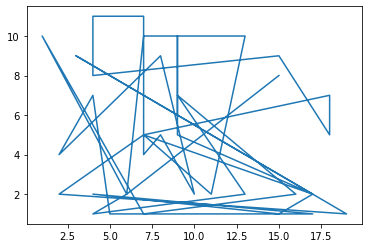

In [48]:
n = 200
end = 8_000
time = b.get(idtuple=(9,1))['TIME'][end::n]
x = b.get(idtuple=(9,1))['_X'][end::n]
y = b.get(idtuple=(9,1))['_Y'][end::n]
plt.plot(x,y)

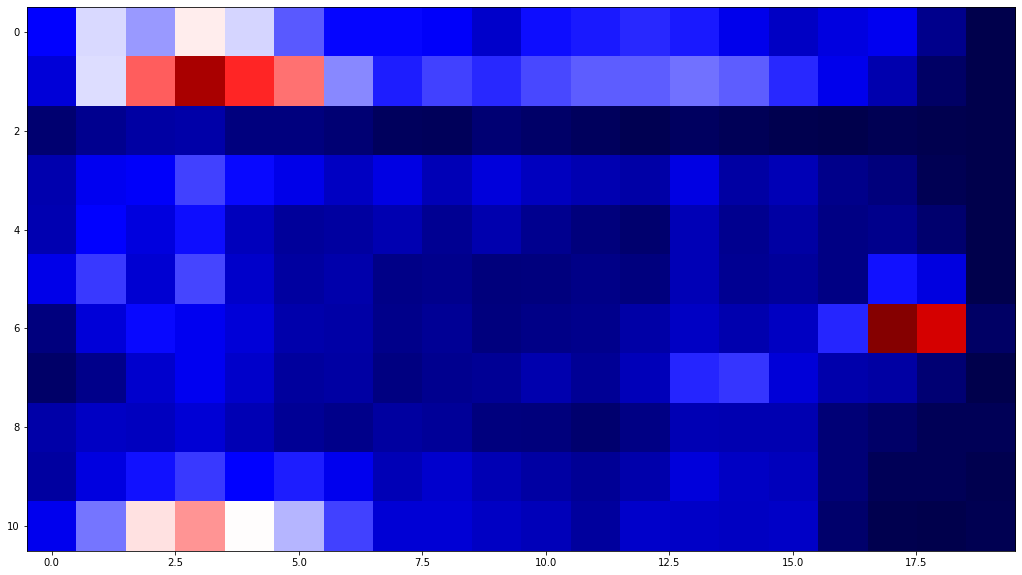

In [154]:
b = behavioral_data.BehavioralData('../../DATA/Habituation1j1603202201rat25.dat')
x = b.get(idtuple=(9,1))['_X']
y = b.get(idtuple=(9,1))['_Y']

array = np.zeros((11,20)) #20 11

loc =pd.concat((x,y),axis=1)

for i in loc.index:
    array[ loc.loc[i,'_Y']-1, loc.loc[i,'_X']-1] += 1

plt.figure(figsize=(20,10))
plt.imshow(array,cmap='seismic',vmin=0,vmax=420)

In [21]:
importlib.reload(behavioral_data)
importlib.reload(fiber_data)
importlib.reload(analysis)
importlib.reload(fp_utils)

<module 'fp_utils' from 'C:\\Users\\mceau\\Documents\\fiberphotopy\\fiberphotopy\\fp_utils.py'>

In [11]:
mov = behavioral_data.BehavioralData('../../DATA/poster_data/bsa01032022c20_02.dat')

In [12]:
mov

GENERAL INFORMATION:
******************************************************************************************************************************************************************
    Filename            : ../../DATA/poster_data/bsa01032022c20_02.dat
    Rat ID              : Not specified
    Experiment duration : 4924.139 (s)
    Time unit           : s (File original unit: ms
    Fixed ratio         : FR5

Useful commands:
    - <obj>.summary() : shows graphical summary of the dat file
    - <obj>.df        : shows raw IMETRONIC data
    - <obj>.elements  : list of elements that can be used in the main functions

Main functions:
    - <obj>.timestamps(param)  : outputs timestamps based on user-defined criteria and optionally outputs a csv of timestamps
    - <obj>._internal_graph(element)     : shows graphical representation of the element
    - <obj>.get(param)         : outputs slice from full dat file (formatted as a DataFrame)

FULL_HELP: <obj>.info

In [65]:
a,b = mov.experiment_duration.values()

In [70]:
a <= mov.df.iloc[-1,0] <= b

False

In [16]:
mov.info()

#################################################################################################################################################################
                                                                    FULL HELP
#################################################################################################################################################################
There are two main types of data, EVENTS and INTERVALS. EVENTS are always lowercase and INTERVALS are uppercase.
For all ON/on commands, corresponding variables with OFF/off exist (eg: 'hled_off' or <obj>.LED1_OFF).
<obj> is the name of the object, ie the user chosen name when creating the object (eg: data = <this_file>.BehavioralData(XX), in that case <obj> is data). 

NB: 
- For all switch (on/off) commands, unnecessary commands are also listed (eg.: if 2 switch off commands occurs in a row, the second one is in the list)
- For all intervals, unnecessary commands are accounted for in order

In [39]:
int(12.6)

12

In [769]:
dicti = {}
whole_start = time.time()
folder_number = 0
file_number = 0
start = time.time()
for folder in os.listdir('_debugAD21R/'):
    for file in os.listdir('_debugAD21R/'+folder):
        if file[-3:] == 'dat':
            file_time = time.time()
            dicti[file] = behavioral_data.BehavioralData('_debugAD21R/'+folder+'/'+file)
            file_number += 1
            print(f"{file} n° {file_number} took {time.time() - file_time}")
    folder_number += 1
    print(f"{folder} n°{folder_number} took {time.time()-start} seconds\n\n")
    start = time.time()
print(f"\n\n Extracted {file_number} files from {folder_number} folders in {time.time() - whole_start} seconds")

bsa13082021c12_01.dat n° 1 took 0.5584216117858887
bsa13082021c13_01.dat n° 2 took 0.32566380500793457
bsa13082021c14_01.dat n° 3 took 0.09028983116149902
44 n°1 took 0.9763739109039307 seconds


bsa16082021c12_01.dat n° 4 took 0.08494877815246582
bsa16082021c13_01.dat n° 5 took 0.32580113410949707
bsa16082021c14_01.dat n° 6 took 0.07303047180175781
45 n°2 took 0.4857792854309082 seconds


bsa25082021c13_01.dat n° 7 took 0.0781245231628418
bsa25082021c14_01.dat n° 8 took 0.27044677734375
bsa25082021c20_01.dat n° 9 took 0.3194437026977539
51 n°3 took 0.720975399017334 seconds


bsa27082021c20_01.dat n° 10 took 0.07131266593933105
53 n°4 took 0.07131266593933105 seconds


bsa15062021c11_01.dat n° 11 took 0.06477093696594238
bsa15062021c12_01.dat n° 12 took 0.05859661102294922
bsa15062021c13_01.dat n° 13 took 0.2920687198638916
bsa15062021c14_01.dat n° 14 took 0.06396174430847168
bsa15062021c15_01.dat n° 15 took 0.05329298973083496
bsa15062021c16_01.dat n° 16 took 0.06249833106994629
bsa1

In [771]:
p08.__dict__

{'hello': 'Hi',
 'configfile': 'config.yaml',
 'config': {'USER': {'GENERAL': {'rat_ID': 'Not specified',
    'file_unit': False,
    'user_unit': 's',
    'experiment_duration': {'min': 29, 'max': 28999}},
   'BEHAVIOR': {'fixed_ratio': 5,
    'close_interval': 5,
    'elements': {'HLED_OFF': [True, 'Drug Period', '#069AF3'],
     'HLED_ON': [True, 'No Drug Period', 'gold'],
     'TTL1_ON': [True, 'Fiber Photometry Recordings', 'g'],
     'np1': [True, 'Active Nosepokes', 'r'],
     'np2': [True, 'Inactive Nosepokes', 'b'],
     'inj1': [True, 'Injections', 'k'],
     'LED1_ON': [True, 'Conditioned Stimulus', 'goldenrod'],
     'LED1_OFF': [False, 'LED1_OFF', ['darkgray', 'darkgrey']],
     'LED2_OFF': [False, 'LED2_OFF', 'slategrey'],
     'LED2_ON': [True, ' Drug Light On', 'slategrey'],
     'DARK': [False, 'DARK', 'k'],
     'TO_DARK': [False, 'TO_DARK', 'olivedrab'],
     'NOTO_DARK': [False, 'NOTO_DARK', 'black'],
     'TIMEOUT': [True, 'Time outs', 'k'],
     'switch_d_nd': [Fa

# Analysis

In [61]:
p04.analyzable_events

{'hled_on': array([2400.002, 5700.003]),
 'hled_off': array([3300.002]),
 'led1_on': array([ 125.99 , 2399.009, 3347.795, 3409.772, 4409.334]),
 'led1_off': array([ 129.99 , 2400.002, 3351.795, 4413.334, 5700.003]),
 'led2_on': array([ 169.99 , 3300.002, 3391.795, 4453.334]),
 'led2_off': array([ 129.99 , 2400.002, 3351.795, 4413.334, 5700.003]),
 'np1': array([  79.846,   80.374,  100.861,  103.791,  125.99 ,  162.613,
        2364.924, 2367.502, 2398.011, 2398.579, 2399.005, 2480.49 ,
        3255.052, 3311.013, 3321.722, 3327.495, 3346.169, 3347.795,
        3404.687, 3406.93 , 3408.584, 3409.468, 3409.772, 4370.796,
        4371.952, 4373.811, 4375.365, 4409.334]),
 'np2': array([ 74.344, 129.699]),
 'inj1': array([ 127.341, 3349.146, 4410.685]),
 'ttl1_on': array([], dtype=float64),
 'ttl1_off': array([], dtype=float64),
 'rec_start': array([], dtype=float64),
 'switch_d_nd': array([2400.002, 5700.003]),
 'switch_to_nd': array([2400.002]),
 'switch_nd_d': array([3300.002]),
 'np1_

In [25]:
ajd3 = analysis.RatSession('../../DATA/ajd/J33/bsa17032022c20_01.dat','../../DATA/ajd/AS21RSAxRat317032022_0.csv')
ajd11 = analysis.RatSession('../../DATA/ajd/J33bis/bsa17032022s2c20_01.dat','../../DATA/ajd/AS21RSAxRat1117032022_0.csv')

In [28]:
ajd3.analyzable_events

{'hled_on': array([2400.007, 5700.017]),
 'hled_off': array([3300.015]),
 'led1_on': array([  53.168, 3322.822, 4437.826, 5611.401]),
 'led1_off': array([  57.168, 2400.007, 3326.822, 4441.826, 5615.401, 5700.017]),
 'led2_on': array([  97.168, 3300.015, 3366.822, 4481.826, 5655.401]),
 'led2_off': array([  57.168, 2400.007, 3326.822, 4441.826, 5615.401, 5700.017]),
 'np1': array([  30.564,   31.246,   36.323,   44.295,   53.164, 3295.71 ,
        3296.111, 3320.736, 3321.158, 3321.661, 3322.034, 3322.822,
        4420.581, 4425.312, 4426.429, 4426.781, 4437.826, 5592.397,
        5593.467, 5610.51 , 5611.028, 5611.401]),
 'np2': array([ 121.123, 3255.565, 3256.681]),
 'inj1': array([  54.519, 3324.173, 4439.177, 5612.752]),
 'ttl1_on': array([], dtype=float64),
 'ttl1_off': array([], dtype=float64),
 'rec_start': array([], dtype=float64),
 'switch_d_nd': array([2400.007, 5700.017]),
 'switch_to_nd': array([], dtype=float64),
 'switch_nd_d': array([3300.015]),
 'np1_1': array([  30.564

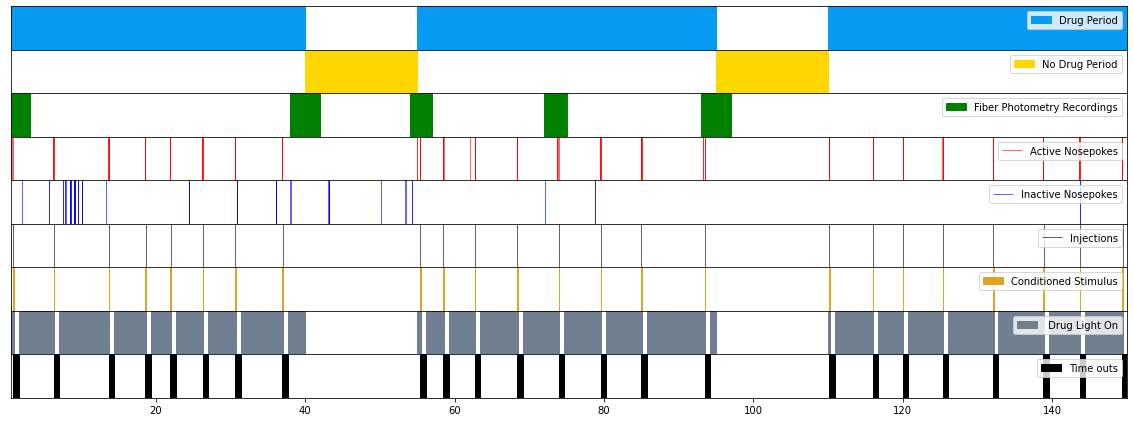

In [29]:
ajd3.behavior.summary()

In [46]:
ana3 = ajd3.analyze_perievent(event_time=ajd3.analyzable_events['switch_d_nd'][0])

In [49]:
print(ana3._possible_data())

'data'
'raw_signal'
'raw_control'
'signal'
'time'
'zscores'
'rob_zscores'


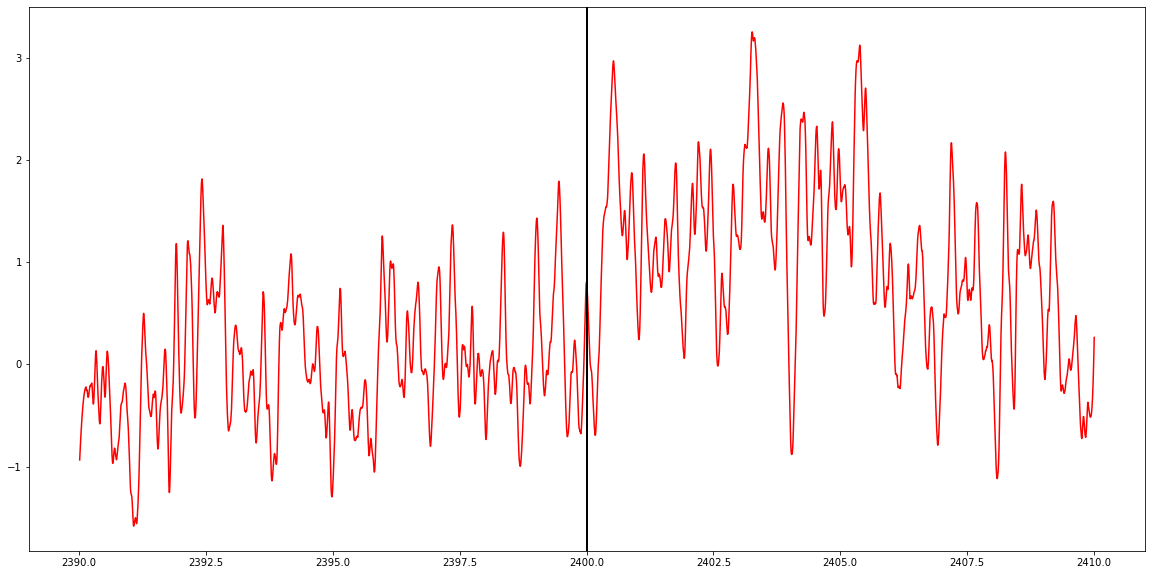

In [50]:
ana3.plot('zscores')

In [52]:
ana3.postAUC

0.06411619533114442

In [53]:
ana3.preAUC

-0.020598577303881278

In [54]:
ana11 = ajd11.analyze_perievent(event_time=ajd11.analyzable_events['switch_d_nd'][0])

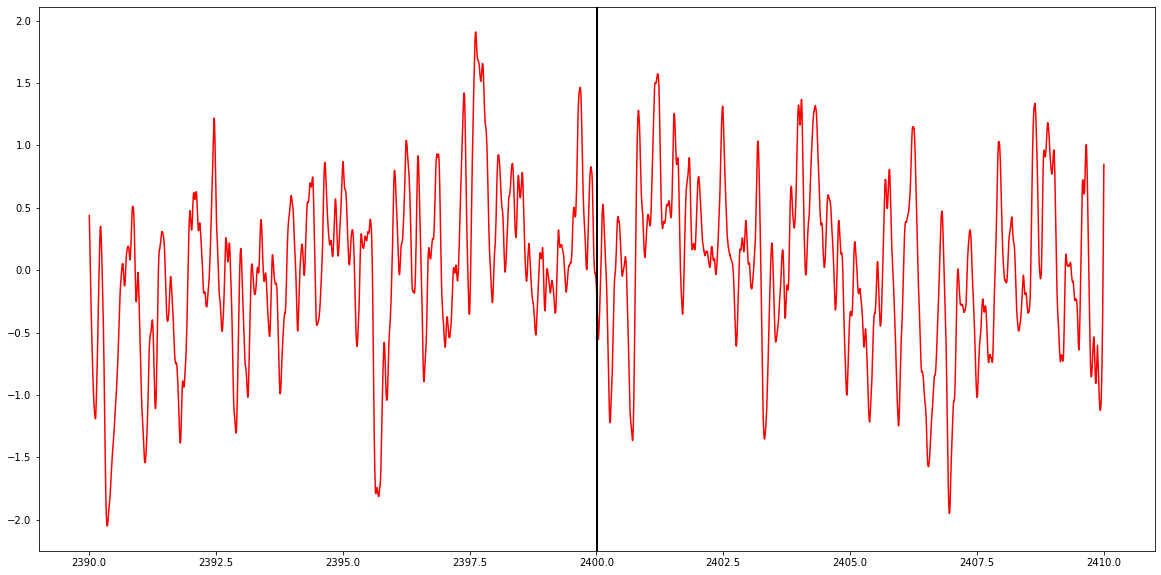

In [55]:
ana11.plot('zscores')

In [57]:
ana3.post_zscores.mean()

1.0334666841872002

In [58]:
ana11.post_zscores.mean()

0.030040271470056525